# Potenciales de acción

La ecuación de Fitzhugh-Nagumo

\begin{equation}
\frac{dV}{dt}=I-v(v-a)(v-1)-w
\end{equation}

\begin{equation}
\frac{dw}{dt}=\epsilon(v-\gamma w)
\end{equation}

Donde $a, \gamma, \epsilon$ son parámetros positivos, $I$ la corriente de entrada, $V$ el voltaje  y $w$ la variable de  recuperación



In [1]:
import scipy as sc
import numpy as np
import sympy as sy
import matplotlib.pylab as plt
import pylab as py
from scipy.optimize import fsolve
%matplotlib inline

In [2]:
#ceroclinas
def cero_x(I,v,a):
    return I-v*(v-a)*(v-1)

def  cero_y(gamma,v):
    return (1/gamma)*v


In [3]:
# Condiciones iniciales y parámetros
eps=0.008
a = 0.139
gamma = 2.54
I=0

voltaje = np.arange(-0.2,0.5,0.01)
x_0= cero_x(I,voltaje,a)
y_0= cero_y(gamma,voltaje)

lugarPuntoFijo = np.argwhere(np.diff(np.sign(x_0 - y_0)) != 0).reshape(-1) + 0
#argwhere nos da el índice donde se cumple que:
#diff calcula la diferencia
#sign da el signo
# "!=" compara 

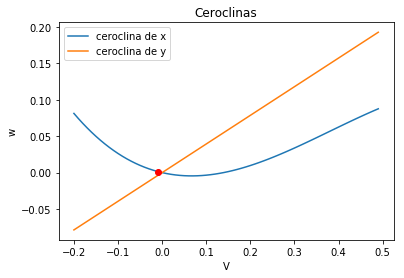

In [4]:
plt.plot(voltaje, x_0, label="ceroclina de x")
plt.plot(voltaje, y_0, label="ceroclina de y")
plt.plot(voltaje[lugarPuntoFijo], x_0[lugarPuntoFijo], 'ro')
plt.xlabel('V')
plt.ylabel('w')
plt.legend()
plt.title('Ceroclinas')
plt.show()

In [5]:
#Matriz jacobiana simbólica
from sympy import Matrix
from sympy.abc import V, W

X = Matrix([I-V*(V-a)*(V-1)-W,eps*(V-gamma*W) ])
Y = Matrix([V, W])
J = X.jacobian(Y)
J


Matrix([
[-V*(V - 1) - V*(V - 0.139) - (V - 1)*(V - 0.139),       -1],
[                                           0.008, -0.02032]])

In [6]:
#evaluando la matriz jacobiana en el punto fijo:
from sympy import *
J=J.subs(V,0)  #Substituye la primera entrada por la segunda, es decir substitye la V por ceros
A=J[0]
B=J[1]
C=J[2]
D=J[3]
J

Matrix([
[-0.139,       -1],
[ 0.008, -0.02032]])

In [7]:
##quiver(X, Y, U, V)

#X,Y lugar de las flechas
#U,V crecimiento
#C color

eps=0.008
a = 0.139
gamma = 2.54
I=0

X , Y  = np.meshgrid(np.arange(-0.2,0.5,0.01), np.arange(-0.2,0.5,0.01))          # hacemos una malla
U = I-X*(X-a)*(X-1)-Y
V = eps*(X-gamma*Y)                             # crecimiento dado por las ecuaciones
M = (np.hypot(U, V))                            # normalización del crecimiento 
M[ M == 0] = 1.                                 # quitamos divisiones entre cero 
U /= M                                          # normalizamos el tamaño de las flechas
V /= M


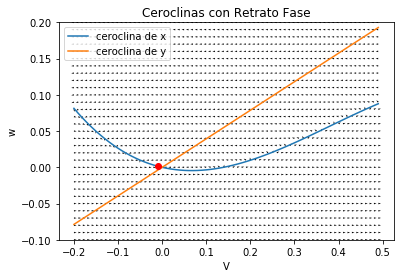

In [8]:
axes = plt.gca()
plt.plot(voltaje, x_0, label="ceroclina de x")
plt.plot(voltaje, y_0, label="ceroclina de y")
plt.quiver(X,Y,U,V)
plt.plot(voltaje[lugarPuntoFijo], x_0[lugarPuntoFijo], 'ro')
axes.set_ylim([-0.1,0.2])
plt.xlabel('V')
plt.ylabel('w')
plt.legend()
plt.title('Ceroclinas con Retrato Fase')
plt.show()

In [9]:
from numpy import *
import pylab as p
#Cálculo de valores propios

j=array([[ -0.139  , -1  ],
        [ 0.008,  -0.02032 ]])
lambda1, lambda2 = linalg.eigvals(j)

##Determinación de estabilidad##

n1=(A+D)/2
n2=((A-D)**2)+(4*B*C)



if n1 < 0:
    print("El punto es estable")
else:
    print("El punto es inestable")

if n2 < 0:
    print("Tiene eigenvalores imaginarios")
    print("L1=", lambda1, "L2=", lambda2)
    print("Se trata de un foco")
else:
    print("Tiene valores reales")
    if abs(A+D)>abs(sqrt(n2)):
        print("los eigenvalores tienen signo igual")
        print("Se trata de un nodo")
    elif abs(A+D)<abs(sqrt(n2)):
        print("los eigenvalores tienen signo contrario")
        print("Se trata de un punto silla")


El punto es estable
Tiene eigenvalores imaginarios
L1= (-0.07966+0.0669235713333j) L2= (-0.07966-0.0669235713333j)
Se trata de un foco


# Método de Euler para integración numérica

Dada una ecuación diferencial 

\begin{equation}
\frac{dx}{dt}=f(x,t; parámetros)
\end{equation}

Con valor inicial 

\begin{equation}
x(t_0)=x_0
\end{equation}

Se puede aproximar la derivada como:

\begin{equation}
\frac{dx}{dt}\simeq \frac{x(t+h)-x(t)}{h}
\end{equation}

Donde h es el tamaño del paso y por lo tanto despejando $x(t+h)$ tenemos:

\begin{equation}
x(t+h) \simeq x()t+h\frac{dx}{dt}=x()t+hf(x,t)
\end{equation}

Podemos aproximar la solución de la forma:

\begin{equation}
x_{n+1}= x_n +hf(x_n,t_n)
\end{equation}


In [36]:
####MÉTODO DE EULER########


# lado derecho de la ecuación 1
def f (I,v,a,w):
    return I-v*(v-a)*(v-1)-w

#lado derecho de la ecuación 2
def g (eps,gamma,v,w):
    return eps*(v-gamma*w)

# Condiciones iniciales y parámetros
eps=0.008
a = 0.139
gamma = 2.54
w0 = 0
v0 = 0

# Tamaño del paso
dt = 0.01

# solución del sistema del tiempo t0 a T (Intervalo temporal)
t0=0
T= 50
t=np.arange(t0,T, dt)
numT=(T-t0)/dt
tpulso=int(numT/4)

# Incializamos los vectores solución
v = np. zeros (len(t))
w = np. zeros (len(t))
v[0] = v0
w[0] = w0

v1 = np. zeros (len(t))
w1 = np. zeros (len(t))
v1[0] = v0
w1[0] = w0

#Generamos un vector de corriente con un pulso 
I = np. zeros (len(t))
for i in range (tpulso, tpulso+50):
    I[i]=0.3
    
#Generamos un vector de corriente con dos pulsos 
I2 = np. zeros (len(t))
for i in range (tpulso, tpulso+20):
    I2[i]=0.3 
for i in range (tpulso+500, tpulso+520):
    I2[i]=0.3

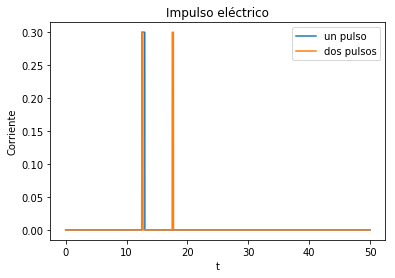

In [37]:
plt.plot(t,I, label="un pulso")
plt.plot(t,I2, label="dos pulsos")
plt.xlabel('t')
plt.ylabel('Corriente')
plt.legend()
plt.title('Impulso eléctrico')



In [38]:
# Integramos usando el método de Euler  
for i in range (1 , len(t)):
    v[i] = v[i -1] + f(I[i],v[i -1],a,w[i -1])* dt
    w[i] = w[i -1] + g(eps,gamma,v[i -1],w[i -1])* dt
    
for i in range (1 , len(t)):
    v1[i] = v1[i -1] + f(I2[i],v1[i -1],a,w1[i -1])* dt
    w1[i] = w1[i -1] + g(eps,gamma,v1[i -1],w1[i -1])* dt

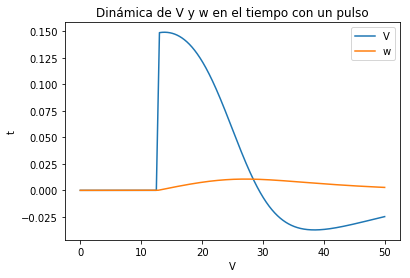

In [39]:
plt.plot(t,v, label="V")
plt.plot(t,w, label="w")
plt.xlabel('V')
plt.ylabel('t')
plt.legend()
plt.title('Dinámica de V y w en el tiempo con un pulso')


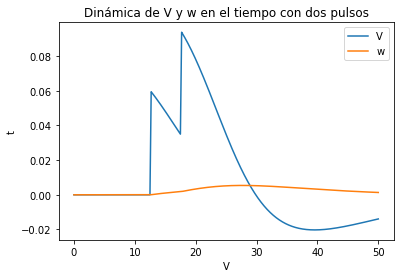

In [40]:
plt.plot(t,v1, label="V")
plt.plot(t,w1, label="w")
plt.xlabel('V')
plt.ylabel('t')
plt.legend()
plt.title('Dinámica de V y w en el tiempo con dos pulsos')

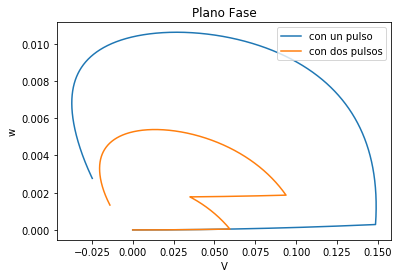

In [41]:
plt.plot(v,w, label="con un pulso")
plt.plot(v1,w1, label= "con dos pulsos")
plt.xlabel('V')
plt.ylabel('w')
plt.legend()
plt.title('Plano Fase')
